### Thresholding Studies - Breast Termo Images for Cancer Detection ###

* OpenCV Thresholding studies based on the work of Lucas Lattari shown in this video: https://www.youtube.com/watch?v=65Xbn1IuYqk&ab_channel=UniversoDiscreto (Image Thresholding for Breast Cancer Detection).

* Lucas github project link: https://github.com/lucaslattari/Python_OpenCV4/blob/master/10_thresholding.ipynb (Also Images Data reference).

* His work was published in this paper: https://sol.sbc.org.br/index.php/sbcas/article/view/9896

* OpenCV Ref: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [4]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

#### Loading Images Data (Breast Termo Images)

In [34]:
mama_images = glob.glob('base_mama/*jpg')

##### Visualization

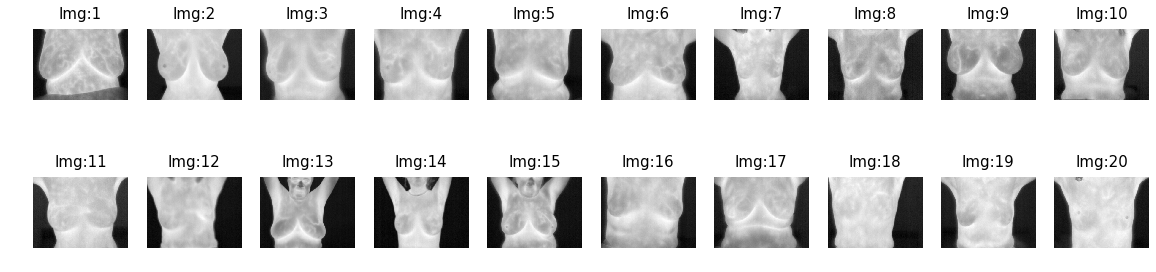

In [102]:
# Let's check 20 first images of the dataset:
ten_images_1 = []
ten_images_2 = []

titles_1 = []
titles_2 = []

for i, image in enumerate(mama_images):
    image = cv2.imread(image)
    
    if (i <=9):
        ten_images_1.append(image)
        titles_1.append('Img:{}'.format(i+1))
    
    if (i > 9):
        ten_images_2.append(image)
        titles_2.append('Img:{}'.format(i+1))
        
    if (i == 19):
        break

images_array = [ten_images_1, ten_images_2]
titles_array = [titles_1, titles_2]

OpCV_Utils.show_multiple_images_plt(images_array, titles_array, fig_size = (20,5))

#### Simple Thresholding cv2 Options:

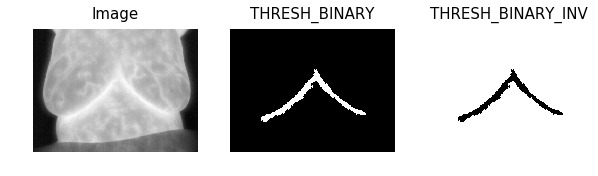

In [104]:
# cv2.THRESH_BINARY (Thresh = 230)

test_img = images_array[0][0]
thresh, img_thresh = cv2.threshold(test_img, 230, 255, cv2.THRESH_BINARY)
thresh, img_thresh_inv = cv2.threshold(test_img, 230, 255, cv2.THRESH_BINARY_INV)

OpCV_Utils.show_multiple_images_plt([[test_img, img_thresh, img_thresh_inv]], [['Image', 'THRESH_BINARY', 'THRESH_BINARY_INV']], fig_size = (10,10))

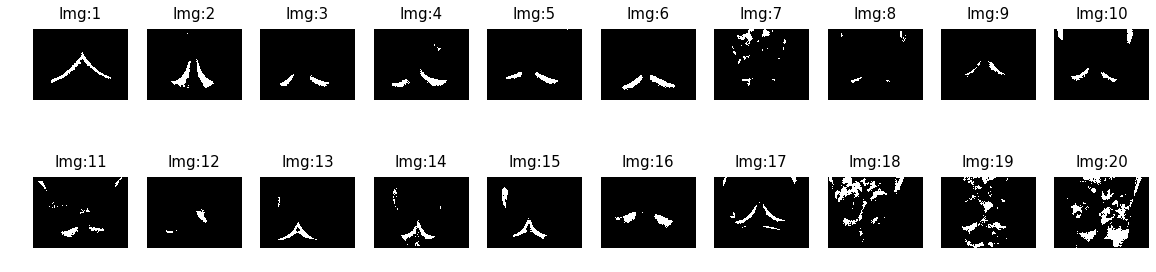

In [103]:
# Let's see how it goes for other images:

# Let's check 20 first images of the dataset:
ten_images_1 = []
ten_images_2 = []

titles_1 = []
titles_2 = []

for i, image in enumerate(mama_images):
    image = cv2.imread(image)
    _, thresh_image = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY)
    
    if (i <=9):
        ten_images_1.append(thresh_image)
        titles_1.append('Img:{}'.format(i+1))
    
    if (i > 9):
        ten_images_2.append(thresh_image)
        titles_2.append('Img:{}'.format(i+1))
        
    if (i == 19):
        break

images_array_thresh = [ten_images_1, ten_images_2]
titles_array_thresh = [titles_1, titles_2]

OpCV_Utils.show_multiple_images_plt(images_array_thresh , titles_array_thresh , fig_size = (20,5))

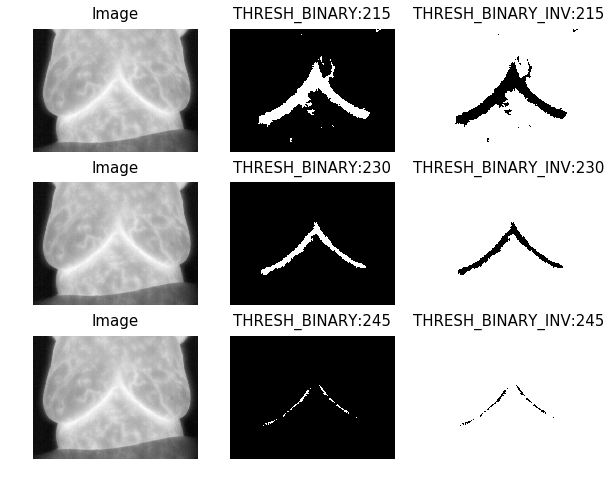

In [105]:
# Let's test more thresh values:

test_img = images_array[0][0]

binary_imgs = []
titles = []

for thresh in range(215,260,15):
    
    _, img_thresh = cv2.threshold(test_img, thresh, 255, cv2.THRESH_BINARY)
    _, img_thresh_inv = cv2.threshold(test_img, thresh, 255, cv2.THRESH_BINARY_INV)
    binary_imgs.append([test_img, img_thresh, img_thresh_inv])
    titles.append(['Image', 'THRESH_BINARY:{}'.format(thresh), 'THRESH_BINARY_INV:{}'.format(thresh)])
    
OpCV_Utils.show_multiple_images_plt(binary_imgs, titles, fig_size = (10,8))  

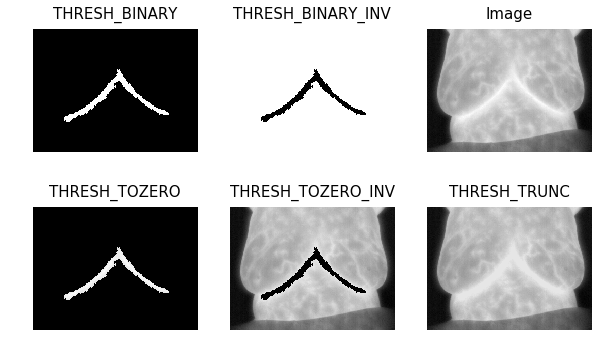

In [106]:
# Other Options:
test_img = images_array[0][0]

thresh = 230

_, img_thresh = cv2.threshold(test_img, thresh, 255, cv2.THRESH_BINARY)
_, img_thresh_inv = cv2.threshold(test_img, thresh, 255, cv2.THRESH_BINARY_INV)

_, img_thresh_zero = cv2.threshold(test_img, thresh, 255, cv2.THRESH_TOZERO)
_, img_thresh_zero_inv = cv2.threshold(test_img, thresh, 255, cv2.THRESH_TOZERO_INV)

_, img_thresh_trunc = cv2.threshold(test_img, thresh, 255, cv2.THRESH_TRUNC)

binary_imgs = [[img_thresh, img_thresh_inv, test_img], [img_thresh_zero, img_thresh_zero_inv, img_thresh_trunc]]
titles = [['THRESH_BINARY', 'THRESH_BINARY_INV', 'Image'], ['THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_TRUNC']]

OpCV_Utils.show_multiple_images_plt(binary_imgs, titles, fig_size = (10,6))  

#### Adaptive Thresholding

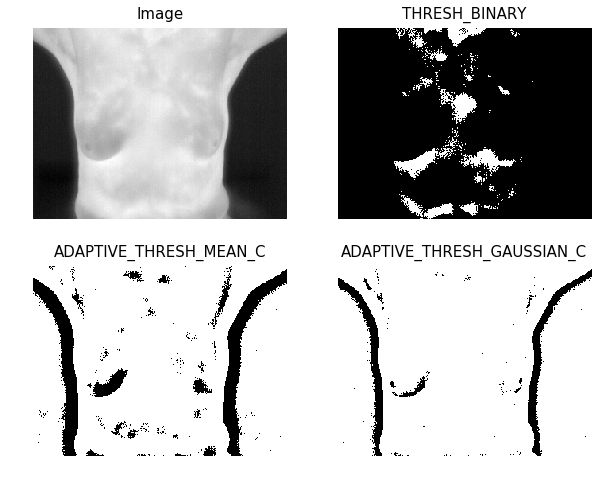

In [159]:
# Let's get a test image which the simple thresholding did not work well:
test_image = images_array[1][8]

# The blockSize determines the size of the neighbourhood area.
# C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.
block_size, C = 33, 10

test_image_copy = test_image.copy()
test_image_copy = test_image_copy[:,:,0]

_, img_thresh = cv2.threshold(test_image, 230, 255, cv2.THRESH_BINARY)
img_adapMean = cv2.adaptiveThreshold(test_image_copy, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
img_adapGauss = cv2.adaptiveThreshold(test_image_copy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

img_adapMean = cv2.cvtColor(img_adapMean, cv2.COLOR_GRAY2RGB)
img_adapGauss = cv2.cvtColor(img_adapGauss, cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_multiple_images_plt([[test_image, img_thresh], [img_adapMean, img_adapGauss]],
                                    [['Image', 'THRESH_BINARY'], ['ADAPTIVE_THRESH_MEAN_C', 'ADAPTIVE_THRESH_GAUSSIAN_C']], fig_size = (10,8))

#### Otsu Binarization ####

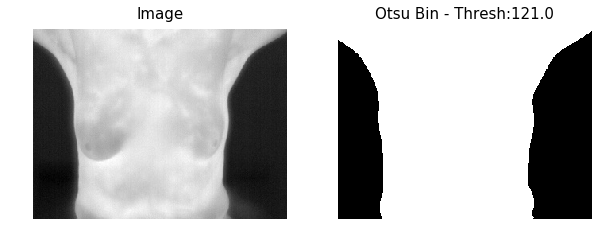

In [235]:
test_image = images_array[1][8]
thresh, otsu_bin = cv2.threshold(test_image.copy()[:,:,0], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
otsu_bin = cv2.cvtColor(otsu_bin, cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_multiple_images_plt([[test_image, otsu_bin]], [['Image', 'Otsu Bin - Thresh:{}'.format(thresh)]], fig_size=(10,10))

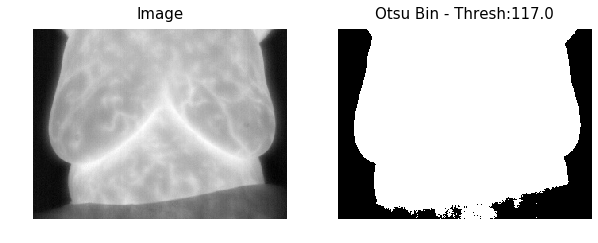

In [236]:
test_image = images_array[0][0]
thresh, otsu_bin = cv2.threshold(test_image.copy()[:,:,0], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
otsu_bin = cv2.cvtColor(otsu_bin, cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_multiple_images_plt([[test_image, otsu_bin]], [['Image', 'Otsu Bin - Thresh:{}'.format(thresh)]], fig_size=(10,10))

## Using Otsu to remove non interesting background info ##

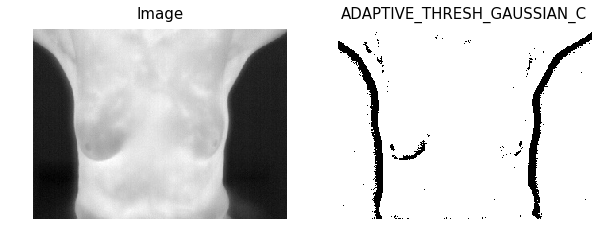

In [269]:
# Let's get a test image which the simple thresholding did not work well:
test_image = images_array[1][8]

# The blockSize determines the size of the neighbourhood area.
# C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.
block_size, C = 31, 10

test_image_copy = test_image.copy()
test_image_copy = test_image_copy[:,:,0]

img_adapGauss = cv2.adaptiveThreshold(test_image_copy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

img_adapGauss = cv2.cvtColor(img_adapGauss, cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_multiple_images_plt([[test_image, img_adapGauss]], [['Image', 'ADAPTIVE_THRESH_GAUSSIAN_C']], fig_size = (10,8))

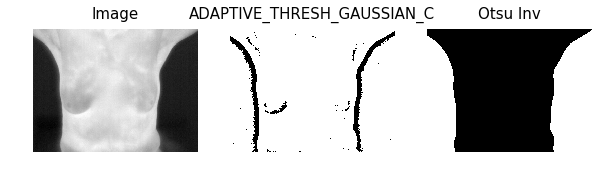

In [270]:
thresh, otsu_bin = cv2.threshold(test_image.copy()[:,:,0], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
otsu_bin = cv2.cvtColor(otsu_bin, cv2.COLOR_GRAY2RGB)
otsu_bin = cv2.bitwise_not(otsu_bin)

OpCV_Utils.show_multiple_images_plt([[test_image, img_adapGauss, otsu_bin]], 
                                    [['Image', 'ADAPTIVE_THRESH_GAUSSIAN_C', 'Otsu Inv']], fig_size = (10,8))

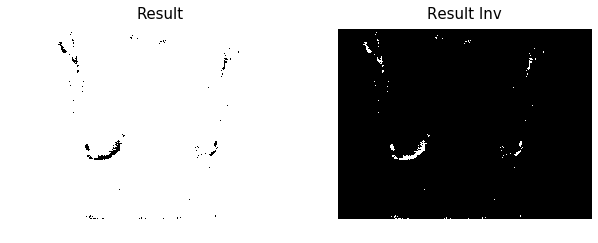

In [271]:
# Let's do a OR operation to take off the background and body contours:
output = cv2.bitwise_or(otsu_bin, img_adapGauss)
output_inv = cv2.bitwise_not(output)
OpCV_Utils.show_multiple_images_plt([[output, output_inv]], [['Result', 'Result Inv']], fig_size=(10,10))

#### Much Better Results with Otsu + Adaptive Gaussian

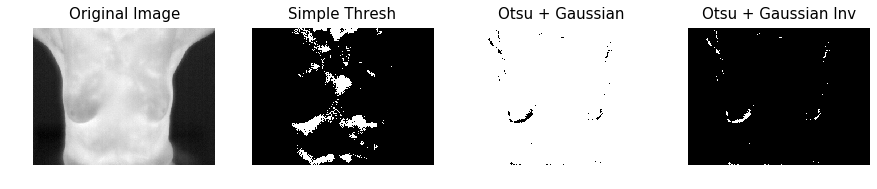

In [272]:
_, img_thresh = cv2.threshold(test_image.copy(), 230, 255, cv2.THRESH_BINARY)

OpCV_Utils.show_multiple_images_plt([[test_image, img_thresh, output, output_inv]], 
                            [['Original Image', 'Simple Thresh','Otsu + Gaussian', 'Otsu + Gaussian Inv']], fig_size=(15,15))

#### Contour Detection ####

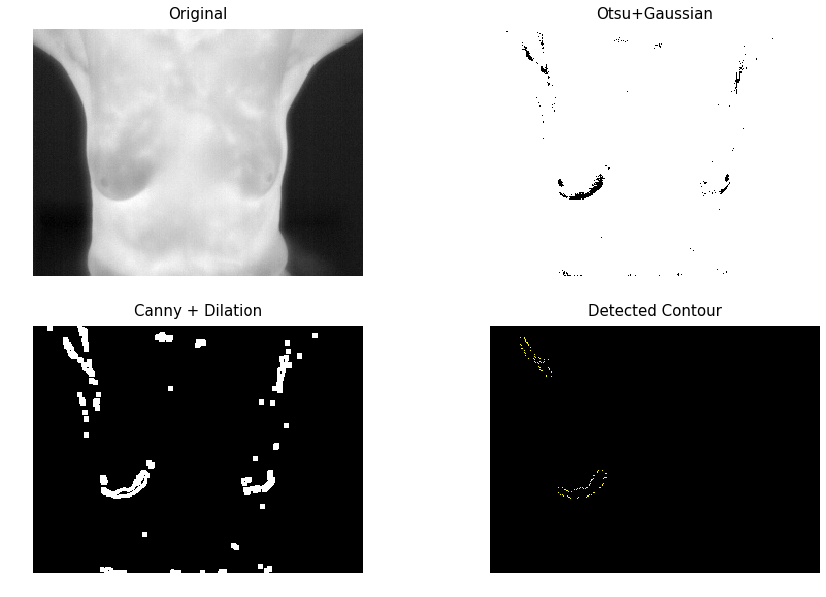

In [275]:
output_canny = OpCV_Utils.custom_canny(output_inv.copy(), canny_thresh = (100,100), dil_level = 1, ero_level = 0)
contours, hiearchy = cv2.findContours(output_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

conts = []

for i, c in enumerate(contours):
        area = cv2.contourArea(c)
        conts.append([c, area])

conts = sorted(conts, key = lambda x:x[1], reverse = True)

biggest_cont = conts[0][0]
second_biggest_cont = conts[1][0]

black_board = np.zeros_like(output)
cv2.drawContours(black_board, biggest_cont, -1, (255,255,0), 1)
cv2.drawContours(black_board, second_biggest_cont, -1, (255,255,0), 1)
output_canny_show = cv2.cvtColor(output_canny.copy(), cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_multiple_images_plt([[test_image, output], [output_canny_show, black_board]], 
                                    [['Original', 'Otsu+Gaussian'], ['Canny + Dilation','Detected Contour']], fig_size = (15,10))